In [39]:
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor

In [40]:
data = pd.read_csv('Dataset/fire_archive.csv')

data.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0


In [41]:
data.shape

(36011, 15)

In [42]:
data.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

No Null values

<Axes: >

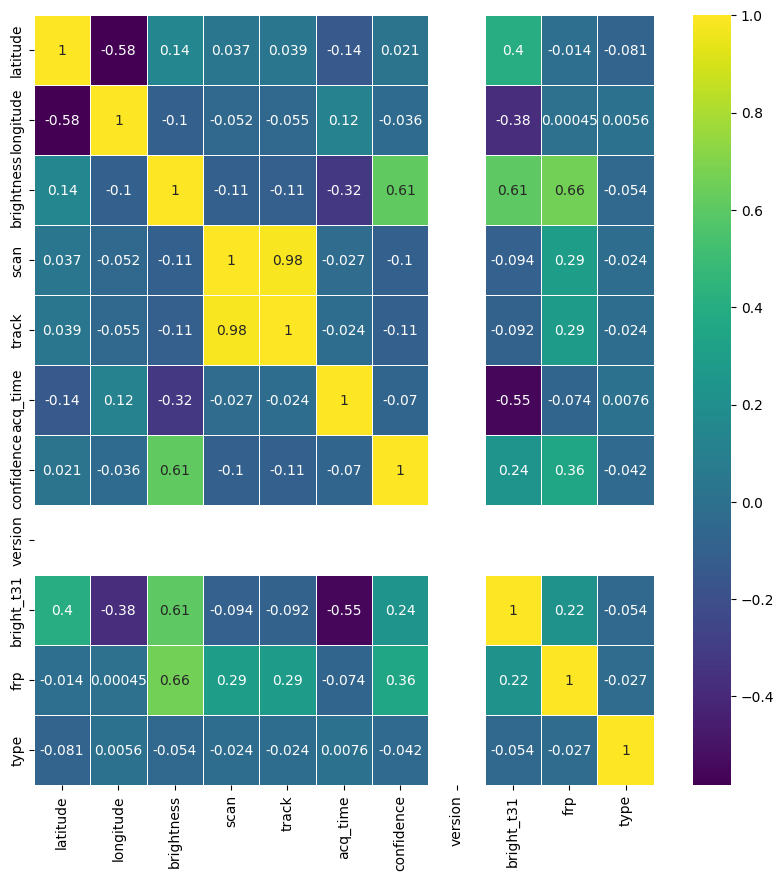

In [43]:
# dropping string columns for heatmap
data_new = data.drop(['acq_date','satellite','instrument','daynight'],axis=1)

plt.figure(figsize=(10, 10))
sns.heatmap(data_new.corr(),annot=True,cmap='viridis',linewidths=.5)

Removing 'track' column due to its high correlation with 'scan' column

In [44]:
data = data.drop(['track'], axis=1)

Removing 'version' column since it has only a single value

In [45]:
data['version'].value_counts()

version
6.3    36011
Name: count, dtype: int64

In [46]:
data = data.drop(['version'],axis=1)

Checking value counts of other columns and removing unwanted ones

In [47]:
# Finding categorical data
print("The scan column")
print(data['scan'].value_counts())
print()
print("The aqc_time column")
print(data['acq_time'].value_counts())
print()
print("The satellite column")
print(data['satellite'].value_counts())
print()
print("The instrument column")
print(data['instrument'].value_counts())
print()
print("The daynight column")
print(data['daynight'].value_counts())
print()

The scan column
scan
1.0    8284
1.1    6000
1.2    3021
1.3    2412
1.4    1848
1.5    1610
1.6    1451
1.7    1281
1.8    1041
1.9     847
2.0     707
2.2     691
2.1     649
2.3     608
2.5     468
2.4     433
2.8     422
3.0     402
2.7     366
2.9     361
2.6     347
3.1     259
3.2     244
3.6     219
3.4     203
3.3     203
3.8     189
3.9     156
4.7     149
4.3     137
3.5     134
3.7     134
4.1     120
4.6     118
4.5     116
4.2     108
4.0     103
4.4     100
4.8      70
Name: count, dtype: int64

The aqc_time column
acq_time
506     851
454     631
122     612
423     574
448     563
       ... 
1558      1
250       1
1728      1
1438      1
233       1
Name: count, Length: 662, dtype: int64

The satellite column
satellite
Aqua     20541
Terra    15470
Name: count, dtype: int64

The instrument column
instrument
MODIS    36011
Name: count, dtype: int64

The daynight column
daynight
D    28203
N     7808
Name: count, dtype: int64



'Scan' column can be converted to categorical, even though it has decimal values

Removing 'instrument' column since it has only one value

In [48]:
data = data.drop(['instrument'], axis=1)

Converting string columns 'daynight' and 'satellite' to numeric

In [49]:
daynight_map = {"D": 1, "N": 0}
satellite_map = {"Terra": 1, "Aqua": 0}

data['daynight'] = data['daynight'].map(daynight_map)
data['satellite'] = data['satellite'].map(satellite_map)

data.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,0
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1,71,297.3,11.3,1,0
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,1,42,298.7,23.1,1,0
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,0
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,1,36,298.8,27.6,1,0


Converting numeric column 'type' to cataegorical

In [50]:
data['type'].value_counts()

type
0    35666
2      335
3       10
Name: count, dtype: int64

In [51]:
types = pd.get_dummies(data['type'])
data = pd.concat([data, types], axis=1)

data = data.drop(['type'], axis = 1)
data = data.rename(columns={0: 'type_0', 2: 'type_2', 3: 'type_3'}) # renaming columns

data.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'acq_date', 'acq_time',
       'satellite', 'confidence', 'bright_t31', 'frp', 'daynight', 'type_0',
       'type_2', 'type_3'],
      dtype='object')

Working on Scan column

In [52]:
# Range for this columns was 1 to 4.8

bins = [0, 1, 2, 3, 4, 5]
labels = [1,2,3,4,5]
data['scan_binned'] = pd.cut(data['scan'], bins=bins, labels=labels)
data = data.drop(['scan'], axis = 1)


In [54]:
# Converting the datatype to datetype from string or numpy.

data['acq_date'] = pd.to_datetime(data['acq_date'])

In [55]:
data['year'] = data['acq_date'].dt.year
data['month'] = data['acq_date'].dt.month
data['day'] = data['acq_date'].dt.day

data = data.drop(['acq_date'],axis=1)
data.head()

,latitude,longitude,brightness,acq_time,satellite,confidence,bright_t31,frp,daynight,type_0,type_2,type_3,scan_binned,year,month,day
0,-11.8070,142.0583,313.0,56,1,48,297.3,6.6,1,True,False,False,1,2019,8,1
1,-11.7924,142.0850,319.3,56,1,71,297.3,11.3,1,True,False,False,1,2019,8,1
2,-12.8398,132.8744,311.6,57,1,42,298.7,23.1,1,True,False,False,4,2019,8,1
3,-14.4306,143.3035,310.1,57,1,33,296.1,6.5,1,True,False,False,2,2019,8,1
4,-12.4953,131.4897,310.3,57,1,36,298.8,27.6,1,True,False,False,4,2019,8,1


In [56]:
data.shape

(36011, 16)

In [58]:
# Separating our target varibale:

y = data['confidence']
data_new = data.drop(['confidence','acq_time', 'bright_t31', 'type_0'], axis = 1)

<Axes: >

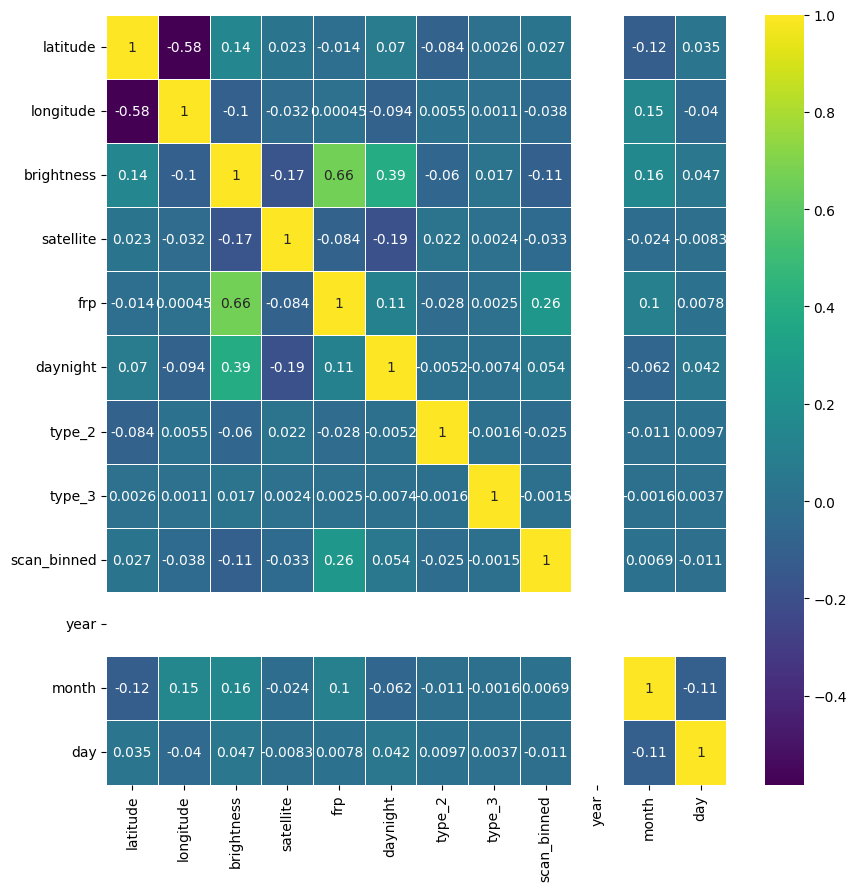

In [59]:
plt.figure(figsize=(10, 10))
sns.heatmap(data_new.corr(),annot=True,cmap='viridis',linewidths=.5)

Correlations look good now

In [60]:
data_new.shape

(36011, 12)

In [61]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data_new.iloc[:, :500], y, test_size=0.2)

Model training

In [64]:
random_model = RandomForestRegressor(n_estimators=300, random_state = 42, n_jobs = -1)
random_model.fit(Xtrain, ytrain)

RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

Accuracy check

In [65]:

y_pred = random_model.predict(Xtest)
random_model_accuracy = round(random_model.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy, 2), '%')

95.33 %


In [66]:
#Checking the accuracy
random_model_accuracy1 = round(random_model.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy1, 2), '%')

64.98 %


Low test accuracy with high train accuracy => overfitting!

In [67]:
# Save the trained model as a pickle string.
import pickle 

saved_model = pickle.dump(random_model, open('Models/model_rfreg.pickle','wb'))

ForestModelOld: model_rfreg

Use RandomizedSearchCV for figuring out best combination of hyperparameters

In [68]:
"""
n_estimators = number of trees in the foreset
max_features = max number of features considered for splitting a node
max_depth = max number of levels in each decision tree
min_samples_split = min number of data points placed in a node before the node is split
min_samples_leaf = min number of data points allowed in a leaf node
bootstrap = method for sampling data points (with or without replacement)
"""

from sklearn.model_selection import RandomizedSearchCV

In [69]:
# pre-define possible values

n_estimators = [int(x) for x in np.linspace(start = 300, stop = 500, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(15, 35, num = 7)]
max_depth.append(None)
min_samples_split = [2, 3, 5]
min_samples_leaf = [1, 2, 4]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                }

In [70]:
# 3-fold cross validation

rf_random = RandomizedSearchCV(estimator = random_model, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(Xtrain, ytrain)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=415; total time=   0.0s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=415; total time=   0.0s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=415; total time=   0.0s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time=   0.0s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time=   0.0s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time=   0.0s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=478; total time=   3.8s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=47

c:\Users\akash\storage\Projects\ForestFirePrediction\ForestFirePrediction\ffpred_env\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
84 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
84 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\akash\storage\Projects\ForestFirePrediction\ForestFirePrediction\ffpred_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\akash\storage\Projects\ForestFirePrediction\ForestFirePrediction\ffpred_env\Lib\site-packages\sklearn\base.py", line 1382,

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_estimators=300, n_jobs=-1,
                                                   random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': [15, 18, 21, 25, 28, 31,
                                                      35, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [300, 310, 321, 331,
                                                         342, 352, 363, 373,
                                                         384, 394, 405, 415,
                                                         426, 436, 447, 457,
                                                         468, 478, 489, 500]},
                   random_state=42, verbose=2)

In [71]:
rf_random.best_params_

{'n_estimators': 394,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

Train using best parameters obtained above

In [72]:
random_new = RandomForestRegressor(n_estimators = 394, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 25, bootstrap = True)

random_new.fit(Xtrain, ytrain)

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=394)

In [73]:
y_pred1 = random_new.predict(Xtest)
random_model_accuracy1 = round(random_new.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy1, 2), '%')

95.34 %


In [74]:
#Checking the accuracy
random_model_accuracy2 = round(random_new.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy2, 2), '%')

67.19 %


In [75]:
saved_model = pickle.dump(random_new, open('Models/model_rsearchcv.pickle','wb'))

ForestModel : model_rsearchcv

Using bz2 to compress model size